# sparc_me with o²S²PARC

> o²S²PARC (also osparc) provides users with an interactive approach to effectively develop, extend, validate, certify, document, store, share, and apply models, explore the impact of stimulation parameters, and create predictive, multi-scale, multi-physics models for a wide range of scenarios -- [o²S²PARC docs](https://docs.osparc.io/#/docs/welcome/what_is_osparc)

In a more simpler term, o²S²PARC gives user the capability to perform a wide variety of workflows on scientific data. Hence, it is important for sparc_me like libraries to work in synergy with o²S²PARC like platforms. 

In this tutorial, we are going through a simple usecase of sparc_me on o²S²PARC. We will;
1. Create a [study](https://docs.osparc.io/#/docs/platform_introduction/studies)
2. Add 3 [services (nodes)](https://docs.osparc.io/#/docs/platform_introduction/services): 2 File Picker nodes and 1 JupyterLab Math (Python+Octave) node
3. Initialize File Picker nodes
4. Add code in JupyterLab node to create an SDS structure dataset from File Picker inputs, using sparc_me
5. Export JupyterLab created dataset as an output.zip, to be used in future nodes.

Prerequisite:
- o²S²PARC account
- Zip sample1 and sample2 dummy data folders separately. They resides in sparc_me repository's [test_data section](https://github.com/SPARC-FAIR-Codeathon/sparc-me/tree/main/examples/test_data).

## Creating the initial study

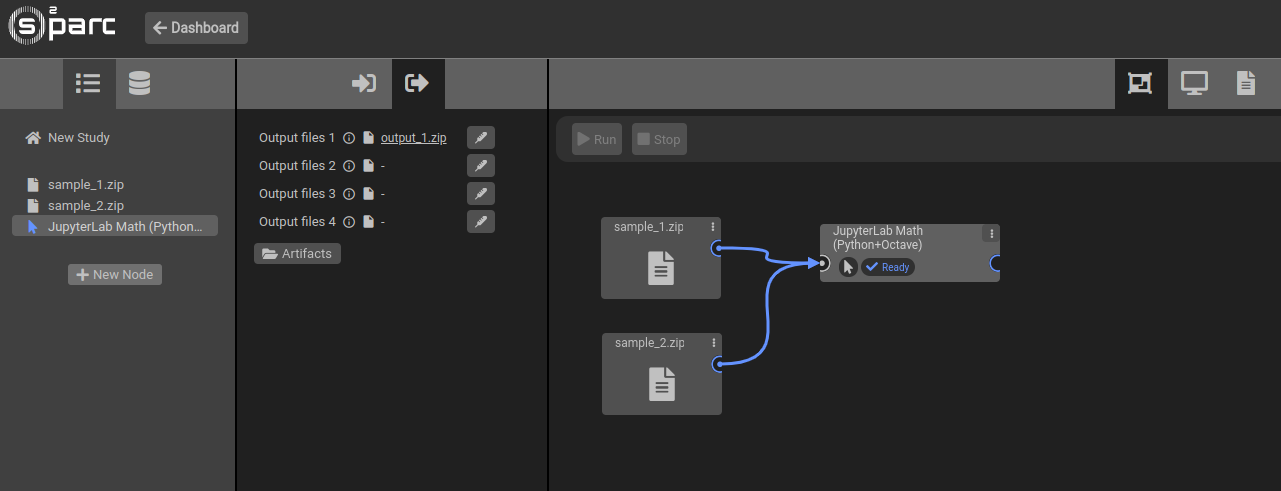

In [4]:
# This code is added only for the purpose of displaying the study overview image
from IPython.display import Image
Image(filename='../docs/images/osparc.png') 

We will be making a study outlined by the above figure.

Steps:
1. In the o²S²PARC dashboard, click on the `Empty Study` button
2. In the resulting window, click `New node` button
3. Pick `File picker` option from the list
4. Drag and drop the sample1 zip file
5. Repeat step 2,3 and 4 for sample2 zip file as well
6. Click `New node` again and pick `JupyterLab Math (Python+Octave)` option from the list
7. Connect the two File Picker nodes to the input port of JupyterLab node from GUI. (Connect the boxes representing the services using arrows from one port to another)
8. Double click on JupyterLab node, and it will switch the view to the `Interactive` view. 
9. Create a new Jupyter notebook in your workspace and asign the Python kernal to it, when prompted.
10. Add the following code to that notebook.

## sparc_me demo code to be run in o²S²PARC jupyter notebook

In this tutorial, we are going to investigate the capabilities of Sparc-ME library in the context of O2S2PARC

### Import all libraries

In [1]:
import os
import shutil
import sys

### Install sparc-me from PyPI

In [2]:
# !{sys.executable} -m pip install sparc_me

### Accessing input data

The zip files you uploaded using the `file picker` will be automatically unzipped to the `../inputs/input_<number>/<zip-file-name>` directory. So now you have two separate directories:
1. `../inputs/input_1/sample1`
2. `../inputs/input_2/sample2`

Now we are going to use sparc_me to create SDS dataset from these data

### Working with sparc_me in o²S²PARC

In [1]:
# Remove when the pip sparc-me is available
%cd sparc-me
!pip install -r requirements.txt

In [6]:
from sparc_me import Dataset

First, lets create the Dataset object

In [7]:
dataset = Dataset()

For the ease of access, lets define the source data paths. When we are doing automation tasks, we can iterate through inputs directory using `os.walk()` like methods and automatically do these kind of steps. 

In [8]:
raw_data_subject_1_paths = ["/home/jovyan/work/inputs/input_1/sample1/raw", "/home/jovyan/work/inputs/input_2/sample2/raw"]
derived_data_subject_1_paths = ["/home/jovyan/work/inputs/input_1/sample1/derived", "/home/jovyan/work/inputs/input_2/sample2/derived"]

Now lets copy data from source directory to into a SDS structure directory. You don't have to manually create this. `sparc_me` will do the hard work for you! Just give a name for your directory. 

Another important thing is, when you are adding data through our library, the metadata modifications will be automatically handled for you.

Also, for the purpose of demonstrating automation aspects, lets assume that sample ids are used as the directory names.

In [2]:
SDS_DIR = "sds_dataset"

# Copy raw data from source directory to SDS structured directory
for path in raw_data_subject_1_paths:
    sample_id = path.split('/')[-2]
    dataset.add_primary_data(source_path=path,
                             subject="subject-1",
                             sample=sample_id,
                             sds_parent_dir=SDS_DIR
                             )

We can perform similar functionality on derived data as well

In [12]:
#  Copy derived data from source directory to derived directory in above created SDS structured directory
for path in derived_data_subject_1_paths:
    sample_id = path.split('/')[-2]
    dataset.add_derivative_data(source_path=path,
                                subject="subject-1",
                                sample=sample_id,
                                sds_parent_dir=SDS_DIR
                                )

### Export created folder as a service output

For another o²S²PARC service to be able to access the generated dataset, we have to export it as a service node output. This can simply be done by moving the created SDS structure dataset directory to `~/work/outputs/output_1` directory

In [3]:
OUTPUT_DIR = "/home/jovyan/work/outputs/output_1/sds_dataset"
shutil.copytree(src=SDS_DIR, dst=OUTPUT_DIR)

Now if we list the output_1 directory, we should be able to see out SDS structure dataset

In [14]:
!ls /home/jovyan/work/outputs/output_1

sds_dataset
